# $\ell_1$-Regularization

In $\ell_1$-regularization, we modify the empirical risk function by adding a term proportional to the $\ell_1$-norm of the parameter vector $\mathbf{w}$. This form of regularization is particularly useful for promoting sparse solutions, where many of the entries in $\mathbf{w}$ are zero. The regularized optimization problem is defined as:

$$
\mathbf{w}_{\text{reg}}^* = \arg\min_{\mathbf{w} \in \mathbb{R}^M} \left( \frac{\alpha}{N} \|\mathbf{w}\|_1 + \frac{1}{N} \sum_{n=1}^{N} \left( y_n - \mathbf{x}_n^T \mathbf{w} \right)^2 \right)
$$

where $\alpha > 0$ is the regularization factor, and $\|\mathbf{w}\|_1$ is the $\ell_1$-norm of $\mathbf{w}$, defined as the sum of the absolute values of its entries.

## Interpretation with Laplacian Prior

Similar to $\ell_2$-regularization, $\ell_1$-regularization can be interpreted through a probabilistic framework. If we assume that the entries of $\mathbf{w}$ are independently drawn from a Laplace distribution with zero mean, the resulting MAP (Maximum A Posteriori) estimation problem leads to $\ell_1$-regularization.

Given $N$ iid observations $\{(y_n, \mathbf{x}_n)\}$, the model assumes that:

$$
y_n = \mathbf{x}_n^T \mathbf{w} + v_n
$$

where $v_n$ is a white Gaussian noise with zero mean and variance $\sigma_v^2$. Assuming a Laplace prior for $\mathbf{w}$:

$$
f_{w_m}(w_m) = \frac{1}{\sqrt{2} \sigma_w} \exp\left( - \frac{\sqrt{2}|w_m|}{\sigma_w} \right)
$$

the MAP estimate is:

$$
\mathbf{w}_{\text{reg}}^* = \arg\min_{\mathbf{w} \in \mathbb{R}^M} \left( \frac{\sqrt{2} \sigma_v^2}{N \sigma_w} \|\mathbf{w}\|_1 + \frac{1}{N} \sum_{n=1}^{N} \left( y_n - \mathbf{x}_n^T \mathbf{w} \right)^2 \right)
$$

By setting $\alpha = \frac{\sqrt{2} \sigma_v^2}{N \sigma_w}$, we recover the $\ell_1$-regularized empirical risk function.

## Resolving Non-Uniqueness

The penalty term $\alpha \|\mathbf{w}\|_1$ is convex, ensuring that the regularized risk function has a unique minimizer if the unregularized risk $P(\mathbf{w})$ is strictly or strongly convex. For least-squares problems, this is the case when $\mathbf{X}^T \mathbf{X} > 0$. If not, elastic-net regularization, which combines $\ell_1$ and $\ell_2$ penalties, can ensure a unique solution.

## Promoting Smaller Solutions

The $\ell_1$-regularization favors solutions with smaller norms. This is evident from the regularized risk function:

$$
\alpha \|\mathbf{w}_{\text{reg}}\|_1 + P(\mathbf{w}_{\text{reg}}) \leq \alpha \|\mathbf{w}\|_1 + P(\mathbf{w})
$$

which implies that:

$$
\|\mathbf{w}_{\text{reg}}\|_1 \leq \|\mathbf{w}\|_1
$$

## Countering Overfitting

$\ell_1$-regularization helps counter overfitting by restricting the search space for the optimal $\mathbf{w}$:

$$
\mathbf{w}_{\text{reg}}^* = \arg\min_{\mathbf{w} \in \mathbb{R}^M} \left( \frac{1}{N} \sum_{n=1}^{N} \left( y_n - \mathbf{x}_n^T \mathbf{w} \right)^2 \right), \text{subject to } \|\mathbf{w}\|_1 \leq \tau
$$

where $\tau$ is a threshold that controls the size of $\mathbf{w}$.

## Promoting Sparsity

$\ell_1$-regularization promotes sparsity in the solution vector $\mathbf{w}$, which is beneficial for high-dimensional data where many features may be irrelevant. The regularization tends to zero out less significant coefficients, effectively performing feature selection.

## Soft-Thresholding

The ability of $\ell_1$-regularization to find sparse solutions can be understood through the soft-thresholding function. A sparse solution helps avoid overfitting, especially for large dimensional data, by assigning zero weights to irrelevant entries in the observation vectors.

#### Soft-Thresholding Function

The soft-thresholding function $T_{\lambda}(z)$ operates on the individual entries of its vector argument $z$ to generate the corresponding entries of $\mathbf{w}$. For each scalar $z$, the transformation $T_{\lambda}(z)$, with parameter $\lambda \geq 0$, is defined as:

$$
T_{\lambda}(z) =
\begin{cases}
z - \frac{\lambda}{2}, & \text{if } z > \frac{\lambda}{2} \\
0, & \text{if } -\frac{\lambda}{2} < z < \frac{\lambda}{2} \\
z + \frac{\lambda}{2}, & \text{if } z < -\frac{\lambda}{2}
\end{cases}
$$

This function promotes sparse solutions by setting to zero all entries of $z$ whose magnitude is below the threshold value $\frac{\lambda}{2}$ and reducing the size of the larger values by $\frac{\lambda}{2}$.

#### Lemma: Soft-Thresholding Operation

Given $z \in \mathbb{R}^M$, a constant $\lambda \geq 0$, and a scalar $\gamma$, the solution to the optimization problem:

$$
\mathbf{w}^* = \arg\min_{\mathbf{w} \in \mathbb{R}^M} \left\{ \lambda \|\mathbf{w}\|_1 + \|\mathbf{w} - \mathbf{z}\|_2^2 + \gamma \right\}
$$

is unique and given by:

$$
\mathbf{w}^* = T_{\lambda}(z)
$$

The soft-thresholding transformation $T_{\lambda}(z)$ helps promote sparse solutions $\mathbf{w}^*$.

#### Orthogonal Data

Consider the special case where the matrix $\mathbf{X}^T \mathbf{X}$ is orthogonal, i.e., $\mathbf{X}^T \mathbf{X} = \kappa^2 \mathbf{I}_M$ for some $\kappa^2 > 0$. The regularized risk function becomes:

$$
P_{\text{reg}}(\mathbf{w}) = \alpha \|\mathbf{w}\|_1 + \frac{1}{N} \left( \|\mathbf{y} - \mathbf{X} \mathbf{w}\|_2^2 \right)
$$

Using the orthogonality condition, the solution is unique and given by:

$$
\mathbf{w}_{\text{reg}}^* = T_{\frac{\alpha N}{2 \kappa^2}}(\mathbf{w}^*)
$$

where $\mathbf{w}^* = \frac{1}{\kappa^2} \mathbf{X}^T \mathbf{y}$ is the minimizer for the unregularized risk.

## Stochastic Proximal Gradient for LASSO

The least absolute shrinkage and selection operator (**LASSO**) problem can be expressed as:

$$
\mathbf{w}_{\text{reg}}^* = \arg\min_{\mathbf{w} \in \mathbb{R}^M} \left( \alpha \|\mathbf{w}\|_1 + \frac{1}{N} \sum_{n=1}^{N} \left( y_n - \mathbf{x}_n^T \mathbf{w} \right)^2 \right)
$$

This problem combines a least-squares loss with an $\ell_1$-norm penalty to promote sparsity in the solution. The Stochastic Proximal Gradient (SPG) algorithm is an iterative method used to find the minimizer of such problems.

### Stochastic Proximal Gradient Algorithm for LASSO

1. **Initialization**: Choose an initial guess $\mathbf{w}^{(-1)}$.
2. **Iteration**: For each iteration $n \geq 0$:
   - **Sample Selection**: Select a random sample $(y_n, \mathbf{x}_n)$ from the dataset.
   - **Gradient Step**: Compute the gradient of the least-squares loss using the selected sample and update the weight vector:
     $$
     \mathbf{z}_n = \mathbf{w}^{(n-1)} + 2\mu \mathbf{x}_n (y_n - \mathbf{x}_n^T \mathbf{w}^{(n-1)})
     $$
   - **Proximal Step (Soft-Thresholding)**: Apply the soft-thresholding function to the updated weight vector:
     $$
     \mathbf{w}^{(n)} = T_{\mu \alpha}(\mathbf{z}_n)
     $$
3. **Convergence**: Repeat the iteration until the algorithm converges (i.e., the changes in $\mathbf{w}$ are sufficiently small).
4. **Output**: The final weight vector $\mathbf{w}^{(n)}$ is the approximate solution $\mathbf{w}^*$.


#### Choosing $\mu$

The value of $\mu$ should be chosen carefully to ensure convergence. If $\mu$ is too large, the algorithm may overshoot and fail to converge. If $\mu$ is too small, the convergence will be very slow.

Typically, $\mu$ is chosen based on the Lipschitz constant of the gradient of the least-squares loss function. For the LASSO problem, it can be defined as:

$$
\mu = \frac{1}{L}
$$

where $L$ is the Lipschitz constant of the gradient of the least-squares loss function. For the least-squares problem, $L$ can be approximated as the largest eigenvalue of $\mathbf{X}^T \mathbf{X}$.

In practice, $\mu$ is often determined through empirical testing or by using adaptive methods that adjust the step-size during the iterations.

This algorithm efficiently handles large-scale problems by updating the solution based on random samples, which helps in reducing computation and memory requirements. The use of the soft-thresholding function ensures that the resulting solution is sparse.

### Conclusion

$\ell_1$-regularization, or LASSO, promotes sparse solutions and effectively performs feature selection by shrinking less relevant coefficients to zero. This regularization technique is powerful in handling high-dimensional data and preventing overfitting.

In [24]:
import jax.numpy as jnp
from jax import random

def generate_synthetic_data(key, num_points=4000, dimension=20, non_zero=5, noise_variance=0.01):
    """
    Generates synthetic data for a linear model with sparse true coefficients and Gaussian noise.
    
    Args:
        key (jax.random.PRNGKey): Random number generator key for reproducibility.
        num_points (int): Number of data points to generate. Default is 4000.
        dimension (int): Dimension of each observation vector. Default is 20.
        noise_variance (float): Variance of the Gaussian noise. Default is 0.01.
        
    Returns:
        X (jnp.ndarray): Generated observation vectors of shape (num_points, dimension).
        y (jnp.ndarray): Response values of shape (num_points,).
        true_coefficients (jnp.ndarray): The true sparse coefficients used to generate the data.
    """
    # Generate the true sparse coefficients
    true_coefficients = jnp.zeros(dimension)
    true_coefficients = true_coefficients.at[random.choice(key, dimension, shape=(non_zero,))].set(1.0)
    
    # Generate the observation vectors
    X = random.normal(key, (num_points, dimension)) + 1.0
    
    # Generate the noise
    noise = random.normal(key, (num_points,)) * jnp.sqrt(noise_variance)
    
    # Generate the response values
    y = jnp.dot(X, true_coefficients) + noise
    
    return X, y, true_coefficients

key = random.PRNGKey(5)

X, y, true_coefficients = generate_synthetic_data(
    key=key,
    num_points=200, 
    dimension=11, 
    non_zero=3,
    noise_variance=0.9
)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("True coefficients:", true_coefficients)

X shape: (200, 11)
y shape: (200,)
True coefficients: [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]


In [25]:
# Example usage with sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# Create a pipeline with standard scaling and custom Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', linear_model.Ridge(alpha=0.1, random_state=0))
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', linear_model.Lasso(alpha=0.1, random_state=0))
])

# Fit the pipeline
ridge_pipeline.fit(X, y)
lasso_pipeline.fit(X, y);

# Get the coefficients for every pipeline
ridge_coef = ridge_pipeline.named_steps['ridge'].coef_
lasso_coef = lasso_pipeline.named_steps['lasso'].coef_

[]

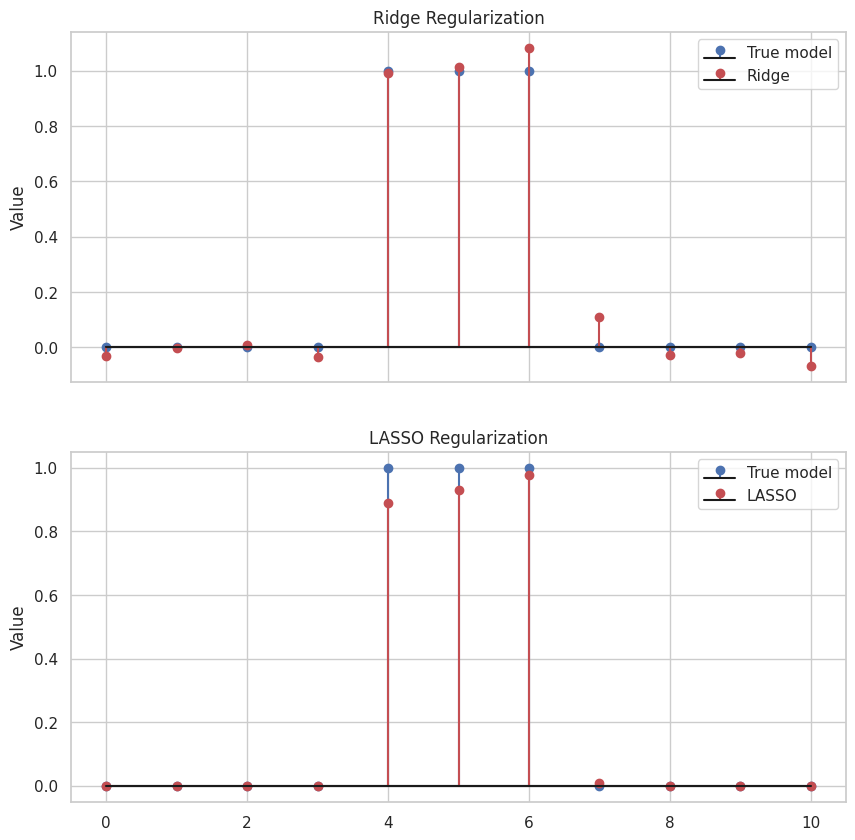

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn for better aesthetics
sns.set(style="whitegrid")

# Plotting the true coefficients, OLS coefficients, and Ridge coefficients
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True, dpi=100)

# Ridge plot
axes[0].stem(range(len(true_coefficients)), true_coefficients, linefmt='b-', markerfmt='bo', basefmt='k-')
axes[0].stem(range(len(ridge_coef)), ridge_coef, linefmt='r-', markerfmt='ro', basefmt='k-')
axes[0].set_title('Ridge Regularization')
axes[0].set_ylabel('Value')
axes[0].legend(['True model', 'Ridge'])

# LASSO plot
axes[1].stem(range(len(true_coefficients)), true_coefficients, linefmt='b-', markerfmt='bo', basefmt='k-')
axes[1].stem(range(len(lasso_coef)), lasso_coef, linefmt='r-', markerfmt='ro', basefmt='k-')
axes[1].set_title('LASSO Regularization')
axes[1].set_ylabel('Value')
axes[1].legend(['True model', 'LASSO'])

plt.plot()